In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [9]:
#Directly split the data into training and testing data because its a built in dataset from keras
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
#X_train has 60000 entries/images each having 28*28 pixels
X_train.shape

(60000, 28, 28)

In [11]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
#y_train has the actual number that the images represent
y_train.shape

(60000,)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

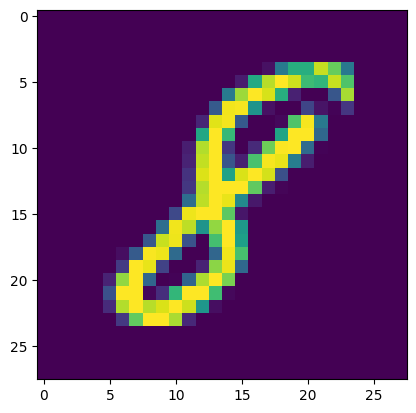

In [14]:
#to see the actual numbers we can plot each row of X_train on matplotlib using imshow
import matplotlib.pyplot as plt
plt.imshow(X_train[7777])

In [15]:
#Dividing all the elements by 255 to normalize the values between 0 and 1 for scaling
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
#We are using the sequential model for this project
model = Sequential()

#we have used flatten to change the 28*28 to 784 by flattening it for fitting
model.add(Flatten(input_shape=(28,28)))
#we have made the first hidden layer with 128 nodes in it and uses relu activation function
model.add(Dense(128,activation = 'relu'))
#the second hidden layer has 32 nodes with relu activation function
model.add(Dense(32,activation='relu'))
#since this is not binary classification and it is multiclass classification with 0 to 9 as target variable there will be 10 nodes in the output
model.add(Dense(10,activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
#the input layer has 784 pixels , second has 128 nodes so 128+(128*784) and thirf has 32 so 32+(32*128) and output theres 10 so 10+(32*10)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#we are using sparse categorical crossentropy as this is multiclass classification and not binary
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [37]:
#we are fitting x train and y train and running it 25 times and splitting the training data into 80/20 with 20% going for validation loss
mdl = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9978 - loss: 0.0073 - val_accuracy: 0.9758 - val_loss: 0.1597
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.9754 - val_loss: 0.1726
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9968 - loss: 0.0092 - val_accuracy: 0.9758 - val_loss: 0.1737
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9972 - loss: 0.0086 - val_accuracy: 0.9757 - val_loss: 0.1754
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9986 - loss: 0.0036 - val_accuracy: 0.9760 - val_loss: 0.1904
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9966 - loss: 0.0120 - val_accuracy: 0.9732 - val_loss: 0.2001
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9757 - val_loss: 0.1825
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9989 - loss: 0.0038 -

In [38]:
#predicting y_test using x_test
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [39]:
#the output y comes with 10 entries eacxh entry signifying how close it is to being that number so we find out the highest out of them to find the prediction
y_pred = y_prob.argmax(axis = 1)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
#got a 97.51 percent accuracy
accuracy_score(y_pred,y_test)

0.9762

In [42]:
import seaborn as sns

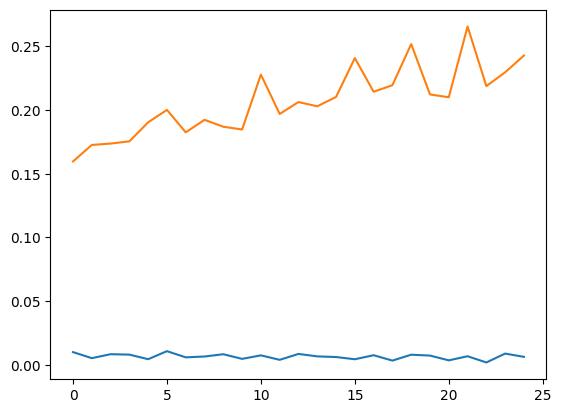

In [46]:
#plot loss and validation loss to find out that validation loss is significantly higher than loss
plt.plot(mdl.history['loss'])
plt.plot(mdl.history['val_loss'])

<Axes: >

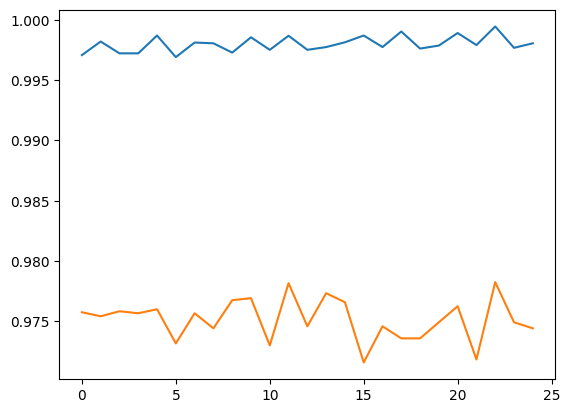

In [49]:
#this is a plot betwen accuracy and val accuracy and val accuracy is consistently lower than accuracy
sns.lineplot(mdl.history['accuracy'])
sns.lineplot(mdl.history['val_accuracy'])

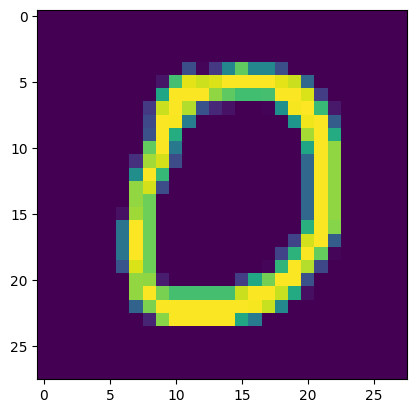

In [44]:
#checking if model can guess the 7th test entry perfectly
plt.imshow(X_test[10])

In [45]:
#it guessed it correctly!!
model.predict(X_test[10].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([0])